In [117]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [118]:
df = pd.read_csv('Loan_Data.csv')

In [119]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [121]:
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [122]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,614.0,5403.459283,6109.041673,150.0,2877.5,3812.5,5795.00,81000.0
CoapplicantIncome,614.0,1621.245798,2926.248369,0.0,0.0,1188.5,2297.25,41667.0
LoanAmount,592.0,146.412162,85.587325,9.0,100.0,128.0,168.00,700.0
Loan_Amount_Term,600.0,342.000000,65.120410,12.0,360.0,360.0,360.00,480.0
Credit_History,564.0,0.842199,0.364878,0.0,1.0,1.0,1.00,1.0


In [123]:
df.drop('Loan_ID',axis=1,inplace=True)

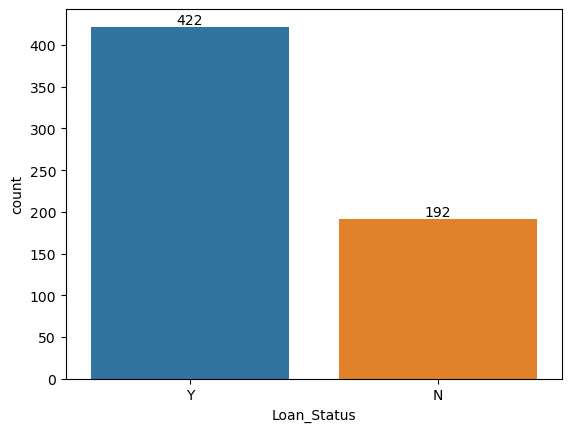

In [124]:
ax = sns.countplot(x=df['Loan_Status'])
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

In [125]:
cat = [col for col in df.columns if df[col].dtype=='object']
cat.remove('Loan_Status')

In [126]:
num = [col for col in df.columns if df[col].dtype!='object']

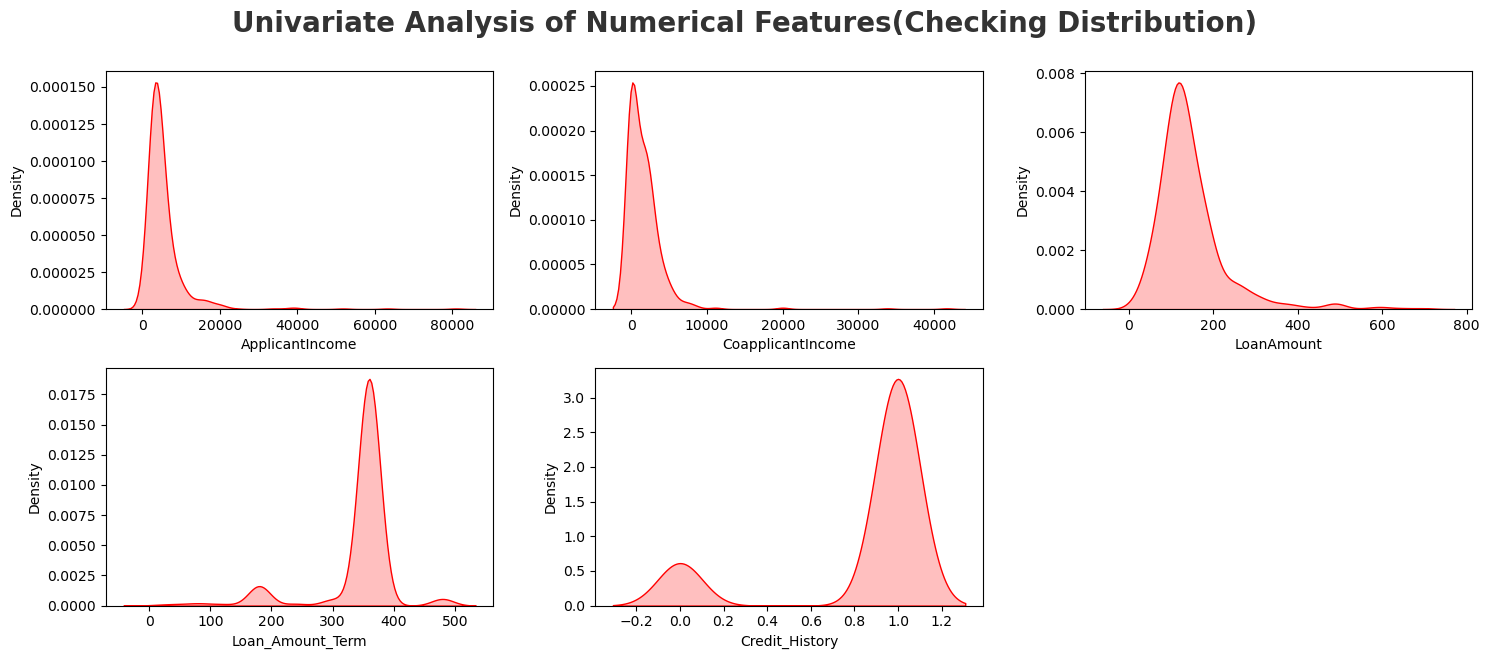

In [127]:
plt.figure(figsize=(15, 15))
plt.suptitle('Univariate Analysis of Numerical Features(Checking Distribution)', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(num)):
    plt.subplot(5, 3, i+1)
    sns.kdeplot(x=df[num[i]],shade=True, color='r')
    plt.xlabel(num[i])
    plt.tight_layout()

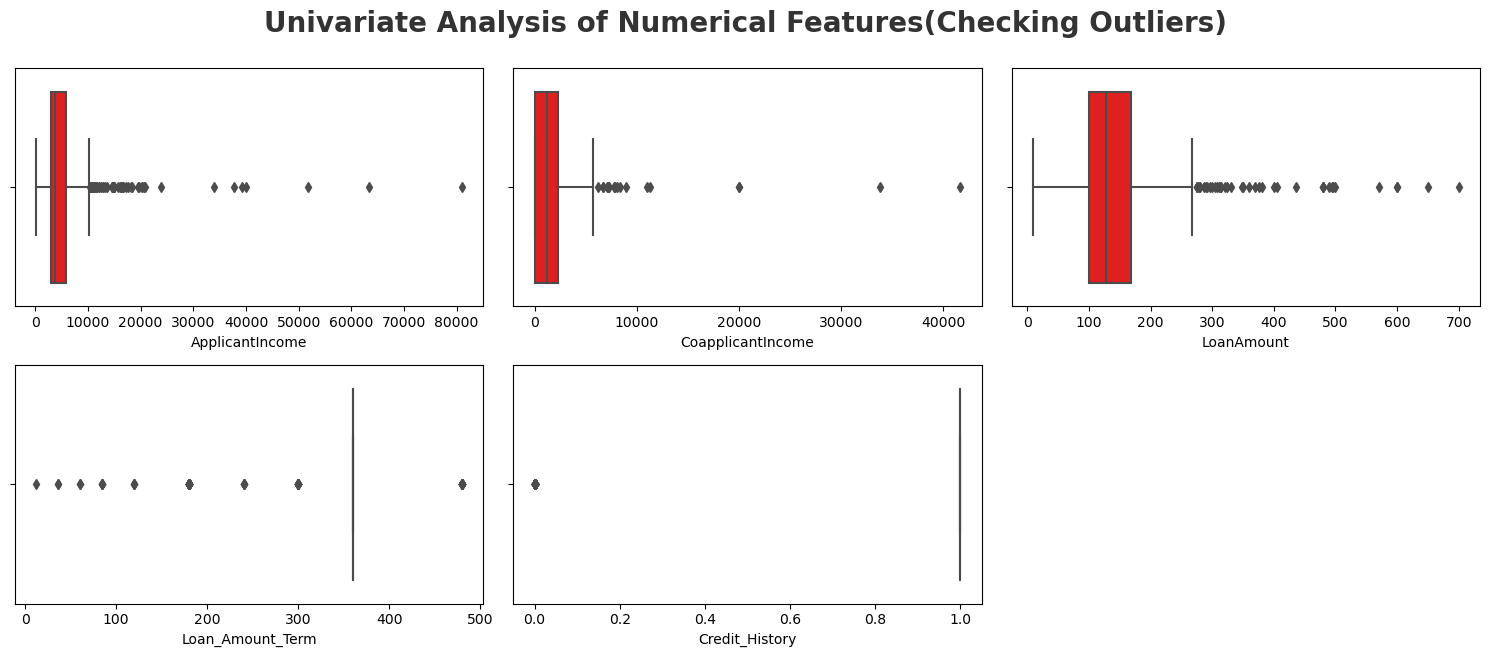

In [128]:
plt.figure(figsize=(15, 15))
plt.suptitle('Univariate Analysis of Numerical Features(Checking Outliers)', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(num)):
    plt.subplot(5, 3, i+1)
    sns.boxplot(x=df[num[i]], color='r')
    plt.xlabel(num[i])
    plt.tight_layout()

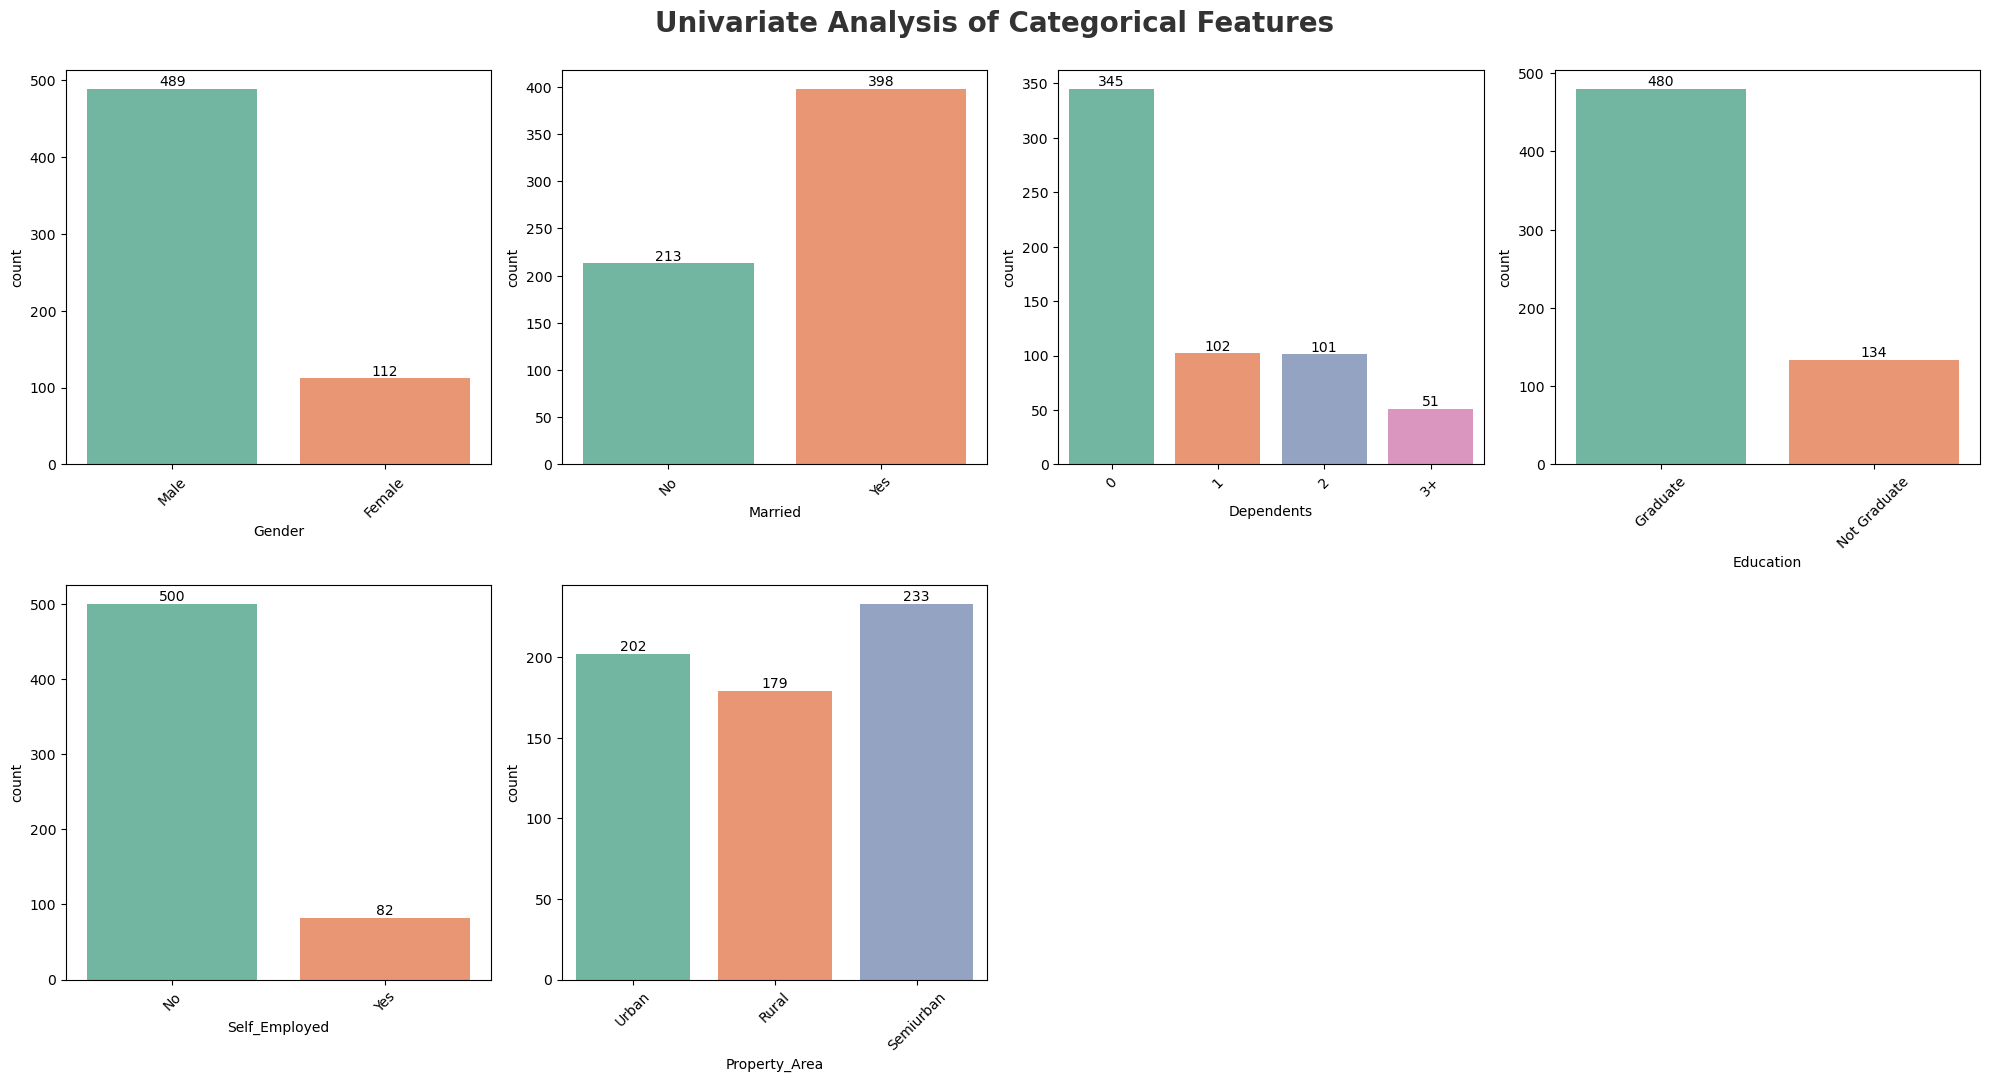

In [129]:
plt.figure(figsize=(20, 15))
plt.suptitle('Univariate Analysis of Categorical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)
category = cat.copy()
for i in range(0, len(category)):
    plt.subplot(3, 4, i+1)
    img = sns.countplot(x=df[category[i]],palette="Set2")
    plt.xlabel(category[i])
    plt.xticks(rotation=45)
    for c in img.containers:
        img.bar_label(c)
    plt.tight_layout() 

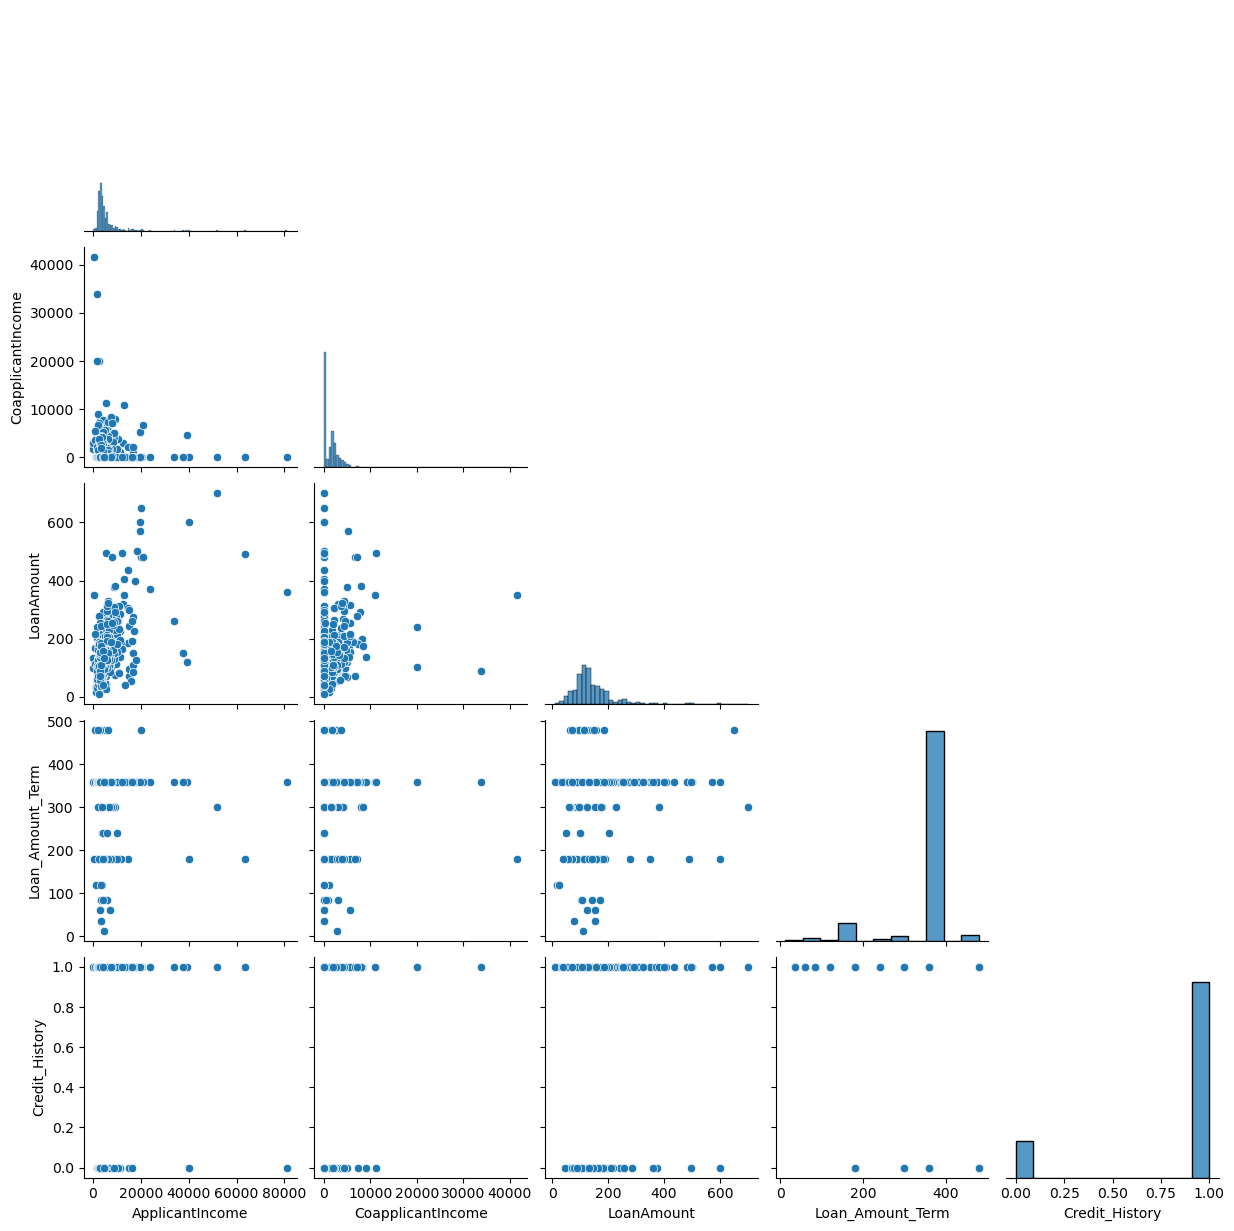

In [130]:
sns.pairplot(df, corner=True)

<AxesSubplot:>

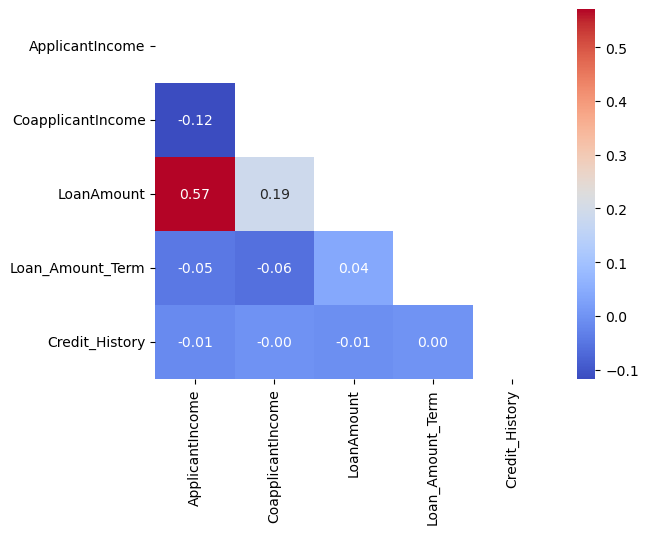

In [131]:
# Compute the lower triangle mask
mask = np.triu(np.ones_like(df.corr(), dtype=bool))

# Create a heatmap with the lower triangle mask
sns.heatmap(df.corr(), mask=mask, cmap='coolwarm', annot=True, fmt=".2f")

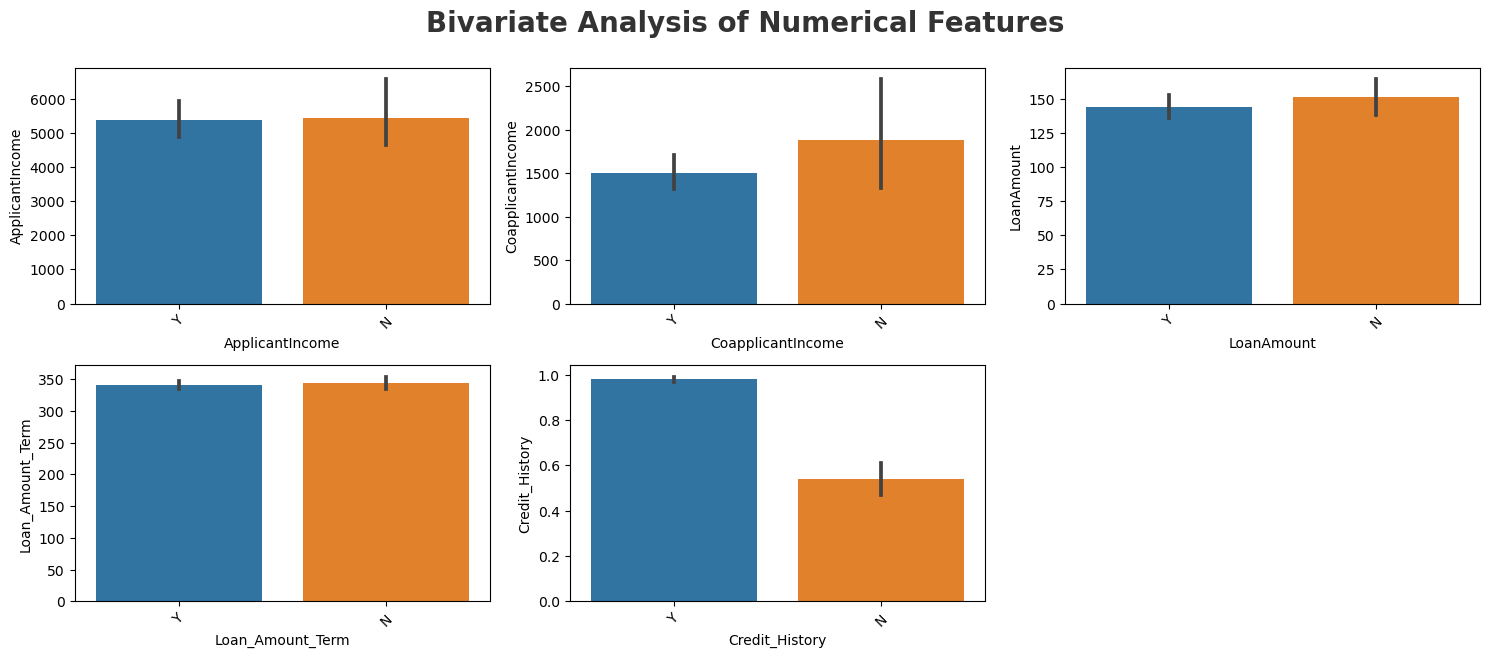

In [132]:
plt.figure(figsize=(15, 15))
plt.suptitle('Bivariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(num)):
    plt.subplot(5, 3, i+1)
    sns.barplot(y=df[num[i]],x=df['Loan_Status'])
    plt.xlabel(num[i])
    plt.xticks(rotation=45)
    plt.tight_layout()

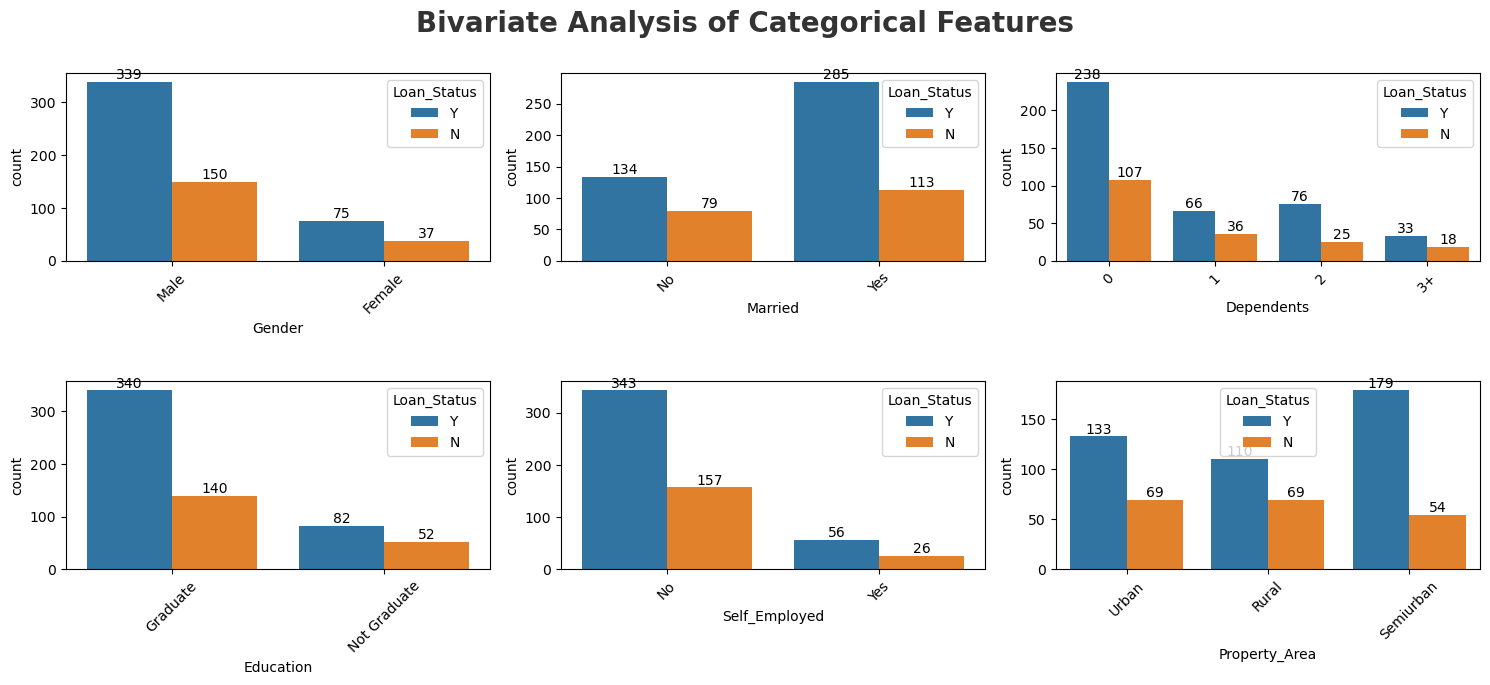

In [133]:
plt.figure(figsize=(15, 15))
plt.suptitle('Bivariate Analysis of Categorical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(cat)):
    plt.subplot(5, 3, i+1)
    ax= sns.countplot(x=df[cat[i]],hue=df['Loan_Status'])
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

    plt.xlabel(cat[i])
    plt.xticks(rotation=45)
    plt.tight_layout()

In [134]:
for col in cat:
    df[col] = df[col].fillna(df[col].mode().iloc[0])

In [135]:
for col in num:
    df[col] = df[col].fillna(df[col].median())

In [136]:
df.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [137]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [138]:
X = df.drop('Loan_Status',axis=1)
y = df['Loan_Status']

In [139]:
from sklearn.preprocessing import OneHotEncoder
X_encoder = OneHotEncoder(sparse=False)
X_encoded = X_encoder.fit_transform(X[cat])

In [140]:
from sklearn.preprocessing import LabelEncoder
y_encoder = LabelEncoder()
y = y_encoder.fit_transform(y)

In [141]:
import joblib
joblib.dump(y_encoder,'y_encoder.pkl')
joblib.dump(X_encoder,'X_encoder.pkl')

['X_encoder.pkl']

In [142]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X[num])

In [150]:
X = np.concatenate((X_encoded, X_scaled), axis=1)

In [151]:
joblib.dump(scaler,'scaler.pkl')

['scaler.pkl']

In [152]:
def evaluate_clf(true, predicted):
    '''
    This function takes in true values and predicted values
    Returns: Accuracy, F1-Score, Precision, Recall, Roc-auc Score
    '''
    acc = accuracy_score(true, predicted) # Calculate Accuracy
    return acc

In [153]:
# Create a function which can evaluate models and return a report 
def evaluate_models(X, y, models):
    '''
    This function takes in X and y and models dictionary as input
    It splits the data into Train Test split
    Iterates through the given model dictionary and evaluates the metrics
    Returns: Dataframe which contains report of all models metrics with cost
    '''
    # separate dataset into train and test
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
    
    models_list = []
    accuracy_list = []
    
    for i in range(len(list(models))):
        model = list(models.values())[i]
        model.fit(X_train, y_train) # Train model

        # Make predictions
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        # Training set performance
        model_train_accuracy=evaluate_clf(y_train ,y_train_pred)


        # Test set performance
        model_test_accuracy=evaluate_clf(y_test, y_test_pred)

        print(list(models.keys())[i])
        models_list.append(list(models.keys())[i])
        print('Model performance for Training set')
        print("- Accuracy: {:.4f}".format(model_train_accuracy))

        print('----------------------------------')

        print('Model performance for Test set')
        print('- Accuracy: {:.4f}'.format(model_test_accuracy))
        print('='*35)
        print('\n')

In [154]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report,ConfusionMatrixDisplay,precision_score, recall_score, f1_score, roc_auc_score,roc_curve,confusion_matrix

from sklearn import metrics 
from sklearn.model_selection import  train_test_split, RepeatedStratifiedKFold, cross_val_score
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

In [155]:
# Dictionary which contains models for experiment
models = {
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Logistic Regression": LogisticRegression(),
     "K-Neighbors Classifier": KNeighborsClassifier(),
    "XGBClassifier": XGBClassifier(), 
     "CatBoosting Classifier": CatBoostClassifier(verbose=False),
    "AdaBoost Classifier": AdaBoostClassifier()
}

In [156]:
evaluate_models(X, y, models)

Random Forest
Model performance for Training set
- Accuracy: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.7642


Decision Tree
Model performance for Training set
- Accuracy: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.7317


Gradient Boosting
Model performance for Training set
- Accuracy: 0.8921
----------------------------------
Model performance for Test set
- Accuracy: 0.7724


Logistic Regression
Model performance for Training set
- Accuracy: 0.8187
----------------------------------
Model performance for Test set
- Accuracy: 0.7886


K-Neighbors Classifier
Model performance for Training set
- Accuracy: 0.8432
----------------------------------
Model performance for Test set
- Accuracy: 0.7724


XGBClassifier
Model performance for Training set
- Accuracy: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.7805


CatBoosting Classifier
Model performance for Traini

In [157]:
from sklearn.model_selection import train_test_split, GridSearchCV

In [158]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [159]:
# Define the logistic regression model
model = LogisticRegression()

# Define the parameter grid for hyperparameter tuning
param_grid = {'C': [0.1, 1.0, 10.0],
              'penalty': ['l1', 'l2'],
              'solver': ['liblinear', 'saga']}

# Perform grid search for best hyperparameters
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.1, 1.0, 10.0], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']})

In [160]:
# Get the best hyperparameters
best_params = grid_search.best_params_

# Train the model with the best hyperparameters
model = LogisticRegression(**best_params)
model.fit(X_train, y_train)

LogisticRegression(C=0.1, solver='liblinear')

In [161]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7886178861788617


In [162]:
joblib.dump(model,'model.pkl')

['model.pkl']

In [163]:
input = [ 'Male','Yes','2','Graduate','Yes',123456.0,1234567.0,4567.0,123.0,0.0,'Urban']
input = pd.DataFrame([input], columns=['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'])

In [112]:
X_encoder.transform(input[['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']])

array([[0., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 1.]])

In [116]:
scaler.transform(input[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History']])

array([[ 19.33998794, 421.68362151,  52.60965255,  -3.40825683,
         -2.42876026]])

In [53]:
pd.get_dummies(input)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_2,Education_Graduate,Self_Employed_Yes,Property_Area_Urban
0,123456.0,1234567.0,4567.0,123.0,0.0,1,1,1,1,1,1
